In [1]:
###Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
###Load .env enviroment variables
load_dotenv()

True

In [3]:
###Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3

In [4]:
###Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
btc = requests.get(btc_url).json()
eth = requests.get(eth_url).json()

In [6]:
###Fetch current BTC price
btc_value = btc["data"]["1"]["quotes"]["CAD"]["price"]
###Fetch current ETH price
eth_value = eth["data"]["1027"]["quotes"]["CAD"]["price"]

In [7]:
###Compute current value of my crpto
my_btc_value = btc_value * my_btc
my_eth_value = eth_value * my_eth

In [8]:
###Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $17960.03
The current value of your 5.3 ETH is $2570.55


In [9]:
###Current amount of shares
my_agg = 200
my_spy = 50

In [10]:
###Set Alpaca API key and secret
alpaca_api_key = os.getenv("api_key_id")
alpaca_secret_key = os.getenv("secret_api_key")
###Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [11]:
###Format current date as ISO format
today = pd.Timestamp("2020-10-08", tz="America/New_York").isoformat()
###Set the tickers
tickers = ["AGG", "SPY"]
###Set timeframe to '1D' for Alpaca API
timeframe = "1D"
###Get current closing prices for SPY and AGG
stocks_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

###Preview DataFrame
stocks_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2020-10-08 00:00:00-04:00  117.67  117.71  117.59  117.69  3561383  342.85   

                                                             
                             high     low   close    volume  
2020-10-08 00:00:00-04:00  343.85  341.86  343.73  35831859

In [12]:
###Pick AGG and SPY close prices
agg_close_price = float(stocks_portfolio["AGG"]["close"])
spy_close_price = float(stocks_portfolio["SPY"]["close"])

###Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.69
Current SPY closing price: $343.73


In [13]:
###Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

###Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17186.50
The current value of your 200 AGG shares is $23538.00


In [14]:
###Set monthly household income
monthly_income = 12000
###Create savings DataFrame
stocks_data = {
    "amount": [(my_btc_value + my_eth_value), (my_agg_value + my_spy_value)]
}
###Set the tickers
tickers_data = ["crypto", "shares"]
df_savings = pd.DataFrame(stocks_data, index=tickers_data)
###Display savings DataFrame
df_savings

,amount
crypto,20530.581897
shares,40724.500000


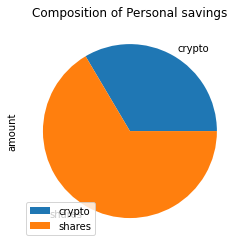

In [15]:
###Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal savings")

In [16]:
###Set ideal emergency fund
emergency_fund = monthly_income * 3
total_savings = my_btc_value + my_eth_value + my_agg_value + my_spy_value
###Calculate total amount of savings
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Congratulations! You reached your financial goal")
elif total_savings < emergency_fund:
    print(f"You are {balance} from reaching your goal")
###Validate saving health
balance = (my_btc_value + my_eth_value + my_agg_value + my_spy_value) - (monthly_income * 3) 

Congratulations! You have enough money in your emergency fund


In [17]:
from MCForecastTools import MCSimulation

In [18]:
###Set start and end dates of five years back from today.
###Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-09', tz='America/New_York').isoformat()

In [19]:
###Get 5 years' worth of historical data for SPY and AGG
df_portfolio_5y = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

###Display sample data
df_portfolio_5y.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-09 00:00:00-04:00  109.32  109.4650  109.2423  109.32  2717365.0   
2015-10-12 00:00:00-04:00  109.48  109.6500  109.3300  109.63   816909.0   
2015-10-13 00:00:00-04:00  109.62  109.7500  109.4900  109.63  1360561.0   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   

                              SPY                                    
                             open    high     low   close    volume  
2015-10-09 00:00:00-04:00  201.37  201.90  200.58  201.36  74424197  
2015-10-12 00:00:00-04:00  201.42  201.76  200.91  201.55  42032769  
2015-10-13 00:00:00-04:00  200.65  202.16  200.05  200.22  72076783  
2015-10-14 00:00:00-04:00  200.18  200.87  198.94  199.27  82856686  
2015-10-15 00:00:00-04:00  200.08  202.34  199.64  202.33  96008389

In [20]:
###Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_30 = MCSimulation(
    portfolio_data = df_portfolio_5y,
    weights = [.40,.60,],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [21]:
###Printing the simulation input data
MC_stocks_30.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-09 00:00:00-04:00  109.32  109.4650  109.2423  109.32  2717365.0   
2015-10-12 00:00:00-04:00  109.48  109.6500  109.3300  109.63   816909.0   
2015-10-13 00:00:00-04:00  109.62  109.7500  109.4900  109.63  1360561.0   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-09 00:00:00-04:00          NaN  201.37  201.90  200.58  201.36   
2015-10-12 00:00:00-04:00     0.002836  201.42  201.76  200.91  201.55   
2015-10-13 00:00:00-04:00     0.000000  200.65  202.16  200.05  200.22   
2015-10-14 00:00:00-04:00     0.003649  200.18  200.87  198.94  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.34  199.64  202.33   

                                                  
                             volume daily_return  
2015-10-09 00:00:00-04:00  74424197          NaN  
2015-10-12 00:00:00-04:00  42032769     0.000944  
2015-10-13 00:00:00-04:00  72076783    -0.006599  
2015-10-14 00:00:00-04:00  82856686    -0.004745  
2015-10-15 00:00:00-04:00  96008389     0.015356

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003392,0.998283,0.990797,0.996659,0.997116,1.014568,1.001261,1.000912,0.991359,0.987944,...,0.997536,0.994616,1.014035,1.004119,1.005691,0.990076,1.003329,0.999966,1.011227,1.014862
2,0.991014,0.993558,0.987506,1.001152,0.995184,1.015693,0.992103,1.016287,0.987919,0.978401,...,0.999251,1.000213,1.017965,0.992045,1.007570,0.995700,1.000959,0.992885,1.011346,1.014892
3,0.985973,0.991289,0.985074,1.000971,0.973344,1.007820,0.995083,1.012177,0.997252,0.983408,...,0.992353,1.011779,1.016966,0.991594,1.013708,0.983453,0.993844,0.992469,1.016120,1.009088
4,0.975910,0.990314,0.990833,1.007049,0.962648,1.011176,0.987764,1.014203,1.004503,0.989094,...,0.993903,1.006207,1.021018,1.003134,1.001263,0.984279,0.988678,0.990351,1.010007,1.006698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,30.302101,8.139635,26.302018,6.541550,8.941669,22.276867,5.187704,16.088517,9.783840,6.863655,...,63.043072,17.092500,10.759392,5.945862,28.084147,11.097024,35.433474,18.460378,5.750846,3.998271
7557,30.352876,8.102414,26.433371,6.562612,8.833187,22.587140,5.159663,16.173114,9.763345,6.800239,...,62.264226,17.197538,10.728313,5.922039,28.029764,11.213406,35.246215,18.579989,5.709201,4.040849
7558,29.980930,8.116213,26.554191,6.653845,8.845068,22.789053,5.238140,16.081756,9.637187,6.684703,...,62.635911,17.395093,10.709870,5.957376,27.890823,11.149182,34.936092,18.384588,5.701923,4.044704
7559,29.793693,8.139074,26.941585,6.654785,8.897073,22.814536,5.222968,15.998514,9.737027,6.715962,...,63.189177,17.765023,10.610367,5.970743,27.709039,11.236250,34.865129,18.359396,5.734355,4.078772


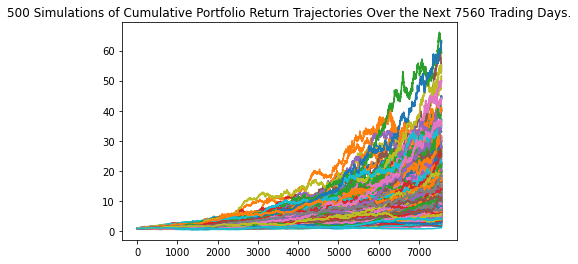

In [23]:
 # Plot simulation outcomes
line_plot = MC_stocks_30.plot_simulation()

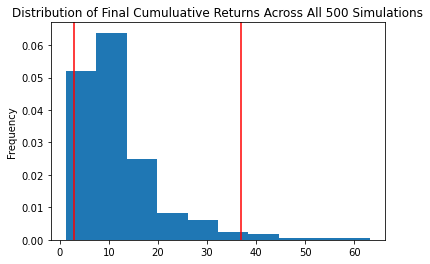

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stocks_30.plot_distribution()

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl = MC_stocks_30.summarize_cumulative_return() 

# Print summary statistics
print(stocks_tbl)

count           500.000000
mean             12.065152
std               8.933099
min               1.181972
25%               6.474840
50%               9.634732
75%              14.594922
max              63.249679
95% CI Lower      2.873967
95% CI Upper     36.818526
Name: 7560, dtype: float64


In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $20,000
ci_lower = round(stocks_tbl[8]*initial_investment,2)
ci_upper = round(stocks_tbl[9]*initial_investment,2)

# Print results
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower} and ${ci_upper} over the next 30 years")

With an initial investment of $20000 in your portfolio you have a 95% chance it will be within in the range of $57479.33 and $736370.52 over the next 30 years


In [27]:
# Set initial investment
initial_investment_inc = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible 
#outcomes of our $30,000
ci_lower_inc = round(stocks_tbl[8]*initial_investment_inc,2)
ci_upper_inc = round(stocks_tbl[9]*initial_investment_inc,2)

# Print results
# Print results
print(f"With an initial investment of ${initial_investment_inc} in your portfolio you have a 95 %" 
      f"chance it will be within in the range of ${ci_lower_inc} and ${ci_upper_inc} over the next 30 years")

With an initial investment of $30000.0 in your portfolio you have a 95 %chance it will be within in the range of $86219.0 and $1104555.78 over the next 30 years


In [28]:
#Optional Challenge - Early Retirement - 5y

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5 = MCSimulation(
    portfolio_data = df_portfolio_5y,
    weights = [.20,.80,],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009877,1.008144,0.985376,0.994842,0.995554,0.988542,1.002522,1.022127,1.002688,0.996851,...,0.996631,0.986811,0.980426,1.003832,0.993417,0.986873,0.990915,1.000573,1.005650,1.034347
2,1.010833,1.008099,0.980329,0.985403,1.002155,0.986281,1.004209,1.011170,1.003070,0.983675,...,0.993545,0.998305,0.962638,0.974920,0.989698,0.979456,0.989363,1.008365,1.007288,1.047186
3,1.015905,1.005343,0.972272,0.990416,0.996931,0.993688,1.024583,1.009099,0.987192,0.972152,...,1.004193,0.998151,0.977621,0.989475,0.977356,0.979943,0.987942,1.004863,1.009952,1.051226
4,1.011130,1.011847,0.962587,0.999038,0.989736,0.995714,1.034282,0.997286,0.962332,0.969804,...,1.011866,1.005207,0.979107,0.992336,0.958608,0.981221,1.009695,1.001229,1.025541,1.056317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.828304,1.166624,3.038670,1.751316,1.548166,1.132737,2.861117,2.058318,2.064215,1.409556,...,2.837359,1.730051,0.728473,1.478088,0.986002,1.675843,3.927471,1.206189,2.295954,1.753159
1257,0.831009,1.179478,3.043575,1.747080,1.554445,1.144758,2.860797,2.077410,2.046811,1.414996,...,2.875678,1.768010,0.723088,1.458409,1.003850,1.668950,3.914803,1.203481,2.316737,1.769286
1258,0.827257,1.170876,3.029615,1.734089,1.548579,1.142802,2.872821,2.101116,2.058470,1.410884,...,2.843857,1.782285,0.716518,1.468119,0.986942,1.659706,3.928287,1.207690,2.319119,1.777835
1259,0.834743,1.178793,3.021867,1.725664,1.562907,1.153762,2.845775,2.071012,2.042851,1.422028,...,2.827005,1.784421,0.713960,1.490997,0.989119,1.666423,3.858937,1.189021,2.315364,1.793331


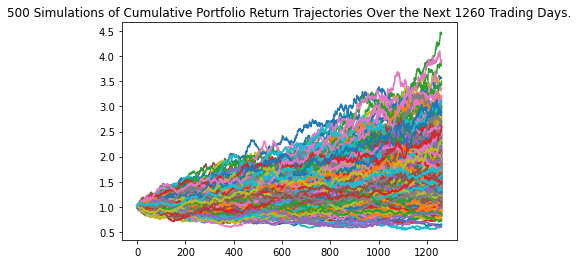

In [31]:
# Plot simulation outcomes 
line_plot_5y = MC_stocks_5.plot_simulation()

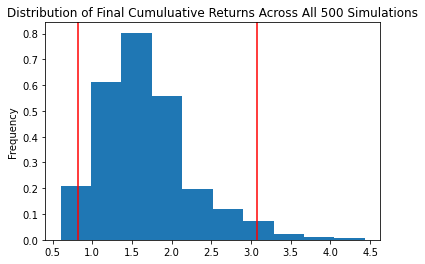

In [32]:
# Plot probability distribution and confidence intervals 
dist_plot_5y = MC_stocks_5.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results 
tbl_5y = MC_stocks_5.summarize_cumulative_return() 
# Print summary statistics 
print(tbl_5y)

count           500.000000
mean              1.672051
std               0.574837
min               0.600864
25%               1.291530
50%               1.569911
75%               1.937306
max               4.433645
95% CI Lower      0.826024
95% CI Upper      3.075823
Name: 1260, dtype: float64


In [34]:
# Set initial investment
initial_investment_ER1 = 300000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
ci_lower_ER1 = round(tbl_5y[8]*initial_investment_ER1,2)
ci_upper_ER1 = round(tbl_5y[9]*initial_investment_ER1,2)

# Print results
# Print results
print(f"With an initial investment of ${initial_investment_ER1} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_ER1} and ${ci_upper_ER1} over the next 5 years")

With an initial investment of $300000 in your portfolio you have a 95% chance it will be within in the range of $247807.13 and $922746.85 over the next 5 years


In [35]:
#Optional Challenge - Early Retirement - 10y

In [36]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_10 = MCSimulation(
    portfolio_data = df_portfolio_5y,
    weights = [.30,.70,],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [37]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001775,0.995079,1.011859,1.000284,1.001282,1.007970,1.011507,0.993519,1.009716,1.010887,...,1.003438,1.004757,1.003453,0.986233,1.014959,0.979897,0.990666,1.011455,0.999958,0.995733
2,1.001617,1.001063,1.009723,1.011027,1.010799,1.029684,0.999869,0.994668,1.015577,1.010588,...,1.008813,0.995089,0.995099,0.997671,1.008329,0.976702,0.999175,1.009020,0.994689,0.994457
3,1.015417,0.996155,1.016358,1.026502,1.020687,1.029231,0.998444,0.978511,1.010074,1.018891,...,1.009229,0.985376,0.998002,0.988341,1.008620,0.975723,1.005750,1.000609,0.984074,0.989159
4,1.026902,0.997208,1.017232,1.029918,1.006646,1.029317,0.994477,0.985249,1.016721,1.017601,...,1.008837,0.990780,1.005160,0.996492,0.995095,0.976906,1.005625,0.999375,0.996588,0.981039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.854536,1.792376,0.708750,3.746642,3.723624,1.056142,2.895724,1.884955,2.117394,3.070142,...,3.629799,1.934221,1.256561,2.457403,4.781318,1.193566,1.142341,2.167959,1.679628,1.937486
2517,1.830863,1.779367,0.708950,3.784289,3.704743,1.059473,2.901922,1.871769,2.113380,3.064748,...,3.611577,1.947412,1.263120,2.440551,4.816188,1.207181,1.138834,2.175298,1.693272,1.948232
2518,1.838871,1.803379,0.697607,3.768524,3.681995,1.058627,2.944980,1.871715,2.095729,3.061339,...,3.623689,1.979158,1.276389,2.442362,4.811495,1.203246,1.148981,2.147683,1.698947,1.950288
2519,1.855276,1.815791,0.694106,3.763586,3.704733,1.061860,2.931785,1.876734,2.115659,3.084360,...,3.597406,1.988124,1.268873,2.502005,4.808344,1.211147,1.156282,2.149497,1.701811,1.976972


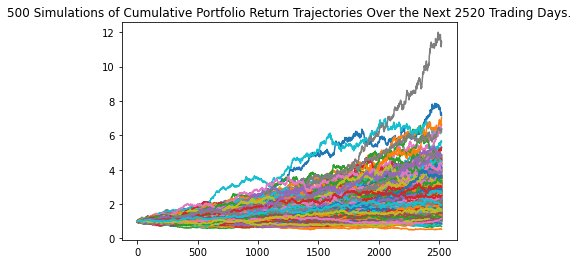

In [38]:
# Plot simulation outcomes 
line_plot_10y = MC_stocks_10.plot_simulation()

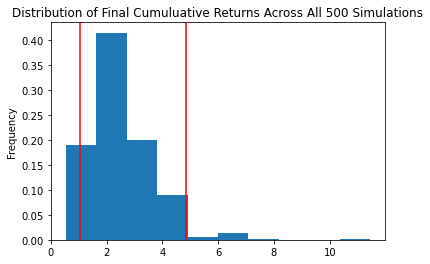

In [39]:
# Plot probability distribution and confidence intervals 
dist_plot_10y = MC_stocks_10.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results 
tbl_10y = MC_stocks_10.summarize_cumulative_return() 
# Print summary statistics 
print(tbl_10y)

count           500.000000
mean              2.519739
std               1.166111
min               0.539765
25%               1.705810
50%               2.296902
75%               3.125415
max              11.443903
95% CI Lower      1.036021
95% CI Upper      4.861828
Name: 2520, dtype: float64


In [41]:
# Set initial investment
initial_investment_ER2 = 200000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
ci_lower_ER2 = round(tbl_10y[8]*initial_investment_ER2,2)
ci_upper_ER2 = round(tbl_10y[9]*initial_investment_ER2,2)

# Print results
print(f"With an initial investment of ${initial_investment_ER2} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_ER2} and ${ci_upper_ER2} over the next 10 years")

With an initial investment of $200000 in your portfolio you have a 95% chance it will be within in the range of $207204.13 and $972365.59 over the next 10 years


In [42]:
print("Financial Analysis")
print("----------------------------")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print("----------------------------")
print(f"With an initial investment of ${initial_investment} in your portfolio you have a 95%" 
      f"chance it will be within in the range of ${ci_lower} and ${ci_upper} over the next 30 years")
print("----------------------------")
print(f"With an initial investment of ${initial_investment_inc} in your portfolio you have a 95%" 
      f"chance it will be within in the range of ${ci_lower_inc} and ${ci_upper_inc} over the next 30 years")
print("----------------------------")
print("----------------------------EARLY RETIREMENT SIMULATION----------------------------")
print(f"With an initial investment of ${initial_investment_ER1} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_ER1} and ${ci_upper_ER1} over the next 5 years")
print("----------------------------")
print(f"With an initial investment of ${initial_investment_ER2} in your portfolio you have a 95% " 
      f"chance it will be within in the range of ${ci_lower_ER2} and ${ci_upper_ER2} over the next 10 years")

Financial Analysis
----------------------------
The current value of your 50 SPY shares is $17186.50
The current value of your 200 AGG shares is $23538.00
----------------------------
With an initial investment of $20000 in your portfolio you have a 95%chance it will be within in the range of $57479.33 and $736370.52 over the next 30 years
----------------------------
With an initial investment of $30000.0 in your portfolio you have a 95%chance it will be within in the range of $86219.0 and $1104555.78 over the next 30 years
----------------------------
----------------------------EARLY RETIREMENT SIMULATION----------------------------
With an initial investment of $300000 in your portfolio you have a 95% chance it will be within in the range of $247807.13 and $922746.85 over the next 5 years
----------------------------
With an initial investment of $200000 in your portfolio you have a 95% chance it will be within in the range of $207204.13 and $972365.59 over the next 10 years


In [43]:
print("Early Retirement Analysis")
print("----------------------------")
print("To be able to retire in 5 years you would have to have an initial investment of ${initial_investment_ER1}"
      f"considering 80% stocks (SPY) and 20% bonds (AGG) composition of the portfolio." 
      f"It would give 95% chance it will be within in the range of ${ci_lower_ER1} and ${ci_upper_ER1} over the next 5 years")
print("----------------------------")
print("To be able to retire in 5 years you would have to have an initial investment of ${initial_investment_ER2}"
      f"considering 70% stocks (SPY) and 30% bonds (AGG) composition of the portfolio." 
      f"It would give 95% chance it will be within in the range of ${ci_lower_ER2} and ${ci_upper_ER2} over the next 5 years")

Early Retirement Analysis
----------------------------
To be able to retire in 5 years you would have to have an initial investment of ${initial_investment_ER1}considering 80% stocks (SPY) and 20% bonds (AGG) composition of the portfolio.It would give 95% chance it will be within in the range of $247807.13 and $922746.85 over the next 5 years
----------------------------
To be able to retire in 5 years you would have to have an initial investment of ${initial_investment_ER2}considering 70% stocks (SPY) and 30% bonds (AGG) composition of the portfolio.It would give 95% chance it will be within in the range of $207204.13 and $972365.59 over the next 5 years
